In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('PECOS.BO.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-11,56.000000,56.000000,53.25,53.25,51.853588,15000.0
1,2015-08-12,51.000000,51.000000,51.00,51.00,49.662590,6000.0
2,2015-08-13,51.000000,51.000000,51.00,51.00,49.662590,0.0
3,2015-08-14,50.049999,50.049999,50.00,50.00,48.688816,9000.0
4,2015-08-17,50.000000,50.000000,50.00,50.00,48.688816,3000.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1217,2020-07-24,28.65,28.65,28.65,28.65,28.65,0.0
1218,2020-07-27,28.65,28.65,28.65,28.65,28.65,1000.0
1219,2020-07-28,28.65,28.65,28.65,28.65,28.65,0.0
1220,2020-07-29,28.65,28.65,28.65,28.65,28.65,0.0
1221,2020-07-30,28.65,28.65,28.65,28.65,28.65,0.0


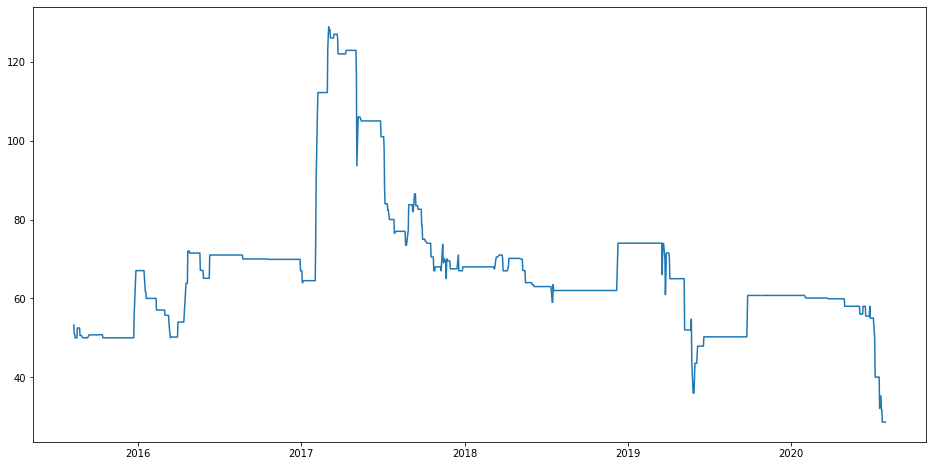

In [4]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [13]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1021,:]
valid = dataset[1021:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

961/961 - 14s - loss: 0.0044


In [15]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

nan

/home/prathmesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


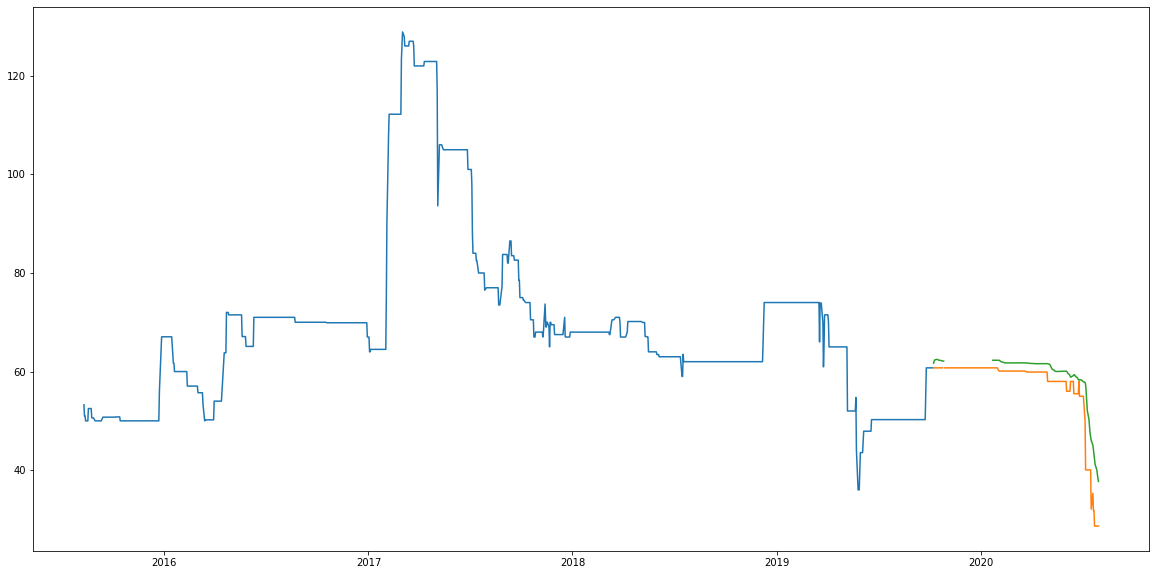

In [16]:
#for plotting
train = new_data[:1021]
valid = new_data[1021:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

array([[[0.02932996],
        [0.02326169],
        [0.02326169],
        ...,
        [0.01896334],
        [0.01643489],
        [0.01896334]],

       [[0.02326169],
        [0.02326169],
        [0.02326169],
        ...,
        [0.01643489],
        [0.01896334],
        [0.01643489]],

       [[0.02326169],
        [0.02326169],
        [0.02022756],
        ...,
        [0.01896334],
        [0.01643489],
        [0.01643489]],

       ...,

       [[0.00884956],
        [0.00884956],
        [0.00884956],
        ...,
        [0.01896334],
        [0.01896334],
        [0.01896334]],

       [[0.00884956],
        [0.00884956],
        [0.00884956],
        ...,
        [0.01896334],
        [0.01896334],
        [0.01390645]],

       [[0.00884956],
        [0.00884956],
        [0.00884956],
        ...,
        [0.01896334],
        [0.01390645],
        [0.01390645]]])